# Анализ метаданных

In [9]:
import os
import csv
from PIL import Image

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
def get_image_info(image_path):
    image = Image.open(image_path)
    info = {
        'Mode': image.mode,
        'Width': image.width,
        'Height': image.height,
        **image.info,
    }
    return info

In [12]:
original_folder = '/content/drive/MyDrive/ITMO/lisa-lab/img/original/'
generated_folder = '/content/drive/MyDrive/ITMO/lisa-lab/img/generated/'

all_info_keys = set()

In [13]:
for original_filename in os.listdir(original_folder):
    if original_filename.endswith('.jpg') or original_filename.endswith('.png'):
        original_image_path = os.path.join(original_folder, original_filename)
        generated_image_path = os.path.join(generated_folder, original_filename)

        if not os.path.exists(generated_image_path):
            for generated_filename in os.listdir(generated_folder):
                original_filename_no_ext = original_filename.split('.')[0]
                if generated_filename.startswith(original_filename_no_ext):
                    generated_image_path = os.path.join(generated_folder, generated_filename)
                    break

        if os.path.exists(generated_image_path):
            original_info = get_image_info(original_image_path)
            generated_info = get_image_info(generated_image_path)

            all_info_keys.update(original_info.keys())
            all_info_keys.update(generated_info.keys())

In [14]:
import pandas as pd

data = []
columns = ['Filename', 'Width', 'Height', 'Mode', *all_info_keys]

for original_filename in os.listdir(original_folder):
    if original_filename.endswith('.jpg') or original_filename.endswith('.png'):
        original_image_path = os.path.join(original_folder, original_filename)
        generated_image_path = os.path.join(generated_folder, original_filename)

        if not os.path.exists(generated_image_path):
            for generated_filename in os.listdir(generated_folder):
                original_filename_no_ext = original_filename.split('.')[0]
                if generated_filename.startswith(original_filename_no_ext):
                    generated_image_path = os.path.join(generated_folder, generated_filename)
                    break

        generated_filename = os.path.basename(generated_image_path)

        if os.path.exists(generated_image_path):
            original_info = get_image_info(original_image_path)
            generated_info = get_image_info(generated_image_path)

            data.append({**{'Filename': original_filename  + " original"}, **original_info})
            data.append({**{'Filename': generated_filename + " modified"}, **generated_info})

df = pd.DataFrame(data, columns=columns)
df.to_csv('output.csv', index=False)
df

,Filename,Width,Height,Mode,exif,jfif,Height,progression,jfif_density,comment,Mode,dpi,jfif_unit,Width,photoshop,jfif_version,progressive
0,5.jpg original,564,564,RGB,NaN,257,564,1.0,"(1, 1)",NaN,RGB,NaN,0,564,NaN,"(1, 1)",1.0
1,5.jpg modified,1472,1472,RGB,NaN,257,1472,1.0,"(72, 72)",NaN,RGB,"(72, 72)",1,1472,NaN,"(1, 1)",1.0
2,4.jpg original,1024,1024,RGB,NaN,257,1024,NaN,"(96, 96)","b'CREATOR: gd-jpeg v1.0 (using IJG JPEG v80), ...",RGB,"(96, 96)",1,1024,NaN,"(1, 1)",NaN
3,4.jpg modified,1024,1024,RGB,NaN,257,1024,NaN,"(96, 96)","b'CREATOR: gd-jpeg v1.0 (using IJG JPEG v80), ...",RGB,"(96, 96)",1,1024,NaN,"(1, 1)",NaN
4,3.jpg original,236,354,RGB,NaN,257,354,1.0,"(72, 72)",NaN,RGB,"(72, 72)",1,236,"{1028: b'', 1061: b'\xd4\x1d\x8c\xd9\x8f\x00\x...","(1, 1)",1.0
5,3.jpg modified,236,354,RGB,NaN,257,354,NaN,"(1, 1)",NaN,RGB,NaN,0,236,NaN,"(1, 1)",NaN
6,2.jpg original,564,705,RGB,NaN,257,705,1.0,"(96, 96)",NaN,RGB,"(96, 96)",1,564,NaN,"(1, 1)",1.0
7,2.jpg modified,564,705,RGB,NaN,257,705,NaN,"(1, 1)",NaN,RGB,NaN,0,564,NaN,"(1, 1)",NaN
8,1.jpg original,612,408,RGB,b'Exif\x00\x00II*\x00\x08\x00\x00\x00\x03\x00\...,257,408,1.0,"(300, 300)",NaN,RGB,"(300, 300)",1,612,{1028: b'\x1c\x02P\x00\tViewApart\x1c\x02x\x00...,"(1, 1)",1.0
9,1.jpg modified,612,408,RGB,NaN,257,408,NaN,"(1, 1)",NaN,RGB,NaN,0,612,NaN,"(1, 1)",NaN


# Распознование лиц

In [ ]:
!pip install deepface
import cv2
from deepface import DeepFace
from typing import List, Dict, Any


def detect_faces(img_path: str) -> List[Dict[str, Any]]:
    img = cv2.imread(img_path)
    detected_faces = DeepFace.extract_faces(img)
    return detected_faces


def extract_face(img_path: str, face_data: Dict[str, Any]) -> Any:
    img = cv2.imread(img_path)
    facial_area = face_data['facial_area']
    x,y,w,h = facial_area['x'], facial_area['y'], facial_area['w'], facial_area['h']
    face_img = img[y:y+h, x:x+w]
    return face_img

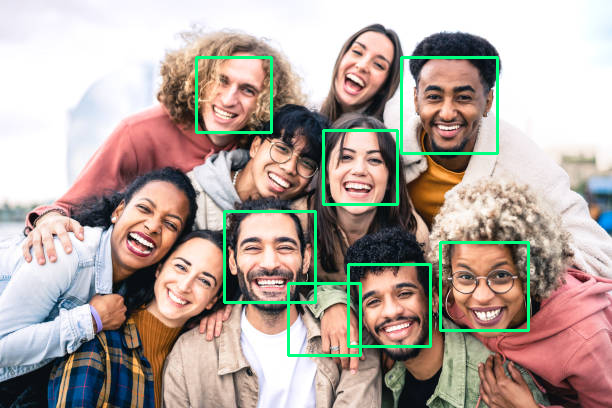

In [16]:
from google.colab.patches import cv2_imshow


img_path = '/content/drive/MyDrive/ITMO/lisa-lab/img/original/'


img = cv2.imread(img_path + '1.jpg')
detected_faces = detect_faces(img_path + '1.jpg')

for i, face_data in enumerate(detected_faces):
    face_img = extract_face(img_path + '1.jpg', face_data)

    #cv2_imshow(face_img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

for face_data in detected_faces:
    face = face_data['face']
    facial_area = face_data['facial_area']
    x,y,w,h = facial_area['x'], facial_area['y'], facial_area['w'], facial_area['h']
    cv2.rectangle(img, (x, y), (x+w, y+h), (128, 255, 0), 2)

cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Методы поиска артефактов

In [8]:
import os
import cv2
import numpy as np
from scipy.stats import pearsonr


def compute_rgb_statistics(image):
    r_channel = image[:,:,0]
    g_channel = image[:,:,1]
    b_channel = image[:,:,2]

    r_mean = np.mean(r_channel)
    g_mean = np.mean(g_channel)
    b_mean = np.mean(b_channel)

    r_median = np.median(r_channel)
    g_median = np.median(g_channel)
    b_median = np.median(b_channel)

    r_quantiles = np.percentile(r_channel, [75, 90])
    g_quantiles = np.percentile(g_channel, [75, 90])
    b_quantiles = np.percentile(b_channel, [75, 90])

    r_var = np.var(r_channel)
    g_var = np.var(g_channel)
    b_var = np.var(b_channel)

    rg_correlation, _ = pearsonr(r_channel.flatten(), g_channel.flatten())
    rb_correlation, _ = pearsonr(r_channel.flatten(), b_channel.flatten())
    gb_correlation, _ = pearsonr(g_channel.flatten(), b_channel.flatten())

    return {
        'r_mean': r_mean, 'g_mean': g_mean, 'b_mean': b_mean,
        'r_median': r_median, 'g_median': g_median, 'b_median': b_median,
        'r_75_quantile': r_quantiles[0], 'g_75_quantile': g_quantiles[0], 'b_75_quantile': b_quantiles[0],
        'r_90_quantile': r_quantiles[1], 'g_90_quantile': g_quantiles[1], 'b_90_quantile': b_quantiles[1],
        'r_var': r_var, 'g_var': g_var, 'b_var': b_var,
        'rg_correlation': rg_correlation, 'rb_correlation': rb_correlation, 'gb_correlation': gb_correlation
    }


def process_images_in_folder(folder_path):
    image_stats = []
    for filename in os.listdir(folder_path):
        if filename.endswith('.jpg') or filename.endswith('.png'):
            image_path = os.path.join(folder_path, filename)
            image = cv2.imread(image_path)
            if image is not None:
                stats = compute_rgb_statistics(image)
                image_stats.append((filename, stats))
    return image_stats


original_folder = '/content/drive/MyDrive/ITMO/lisa-lab/img/original/'
generated_folder = '/content/drive/MyDrive/ITMO/lisa-lab/img/generated/'

original_stats = process_images_in_folder(original_folder)
generated_stats = process_images_in_folder(generated_folder)

print(original_stats)
print(generated_stats)


[('5.jpg', {'r_mean': 108.80717770735879, 'g_mean': 138.94754413761882, 'b_mean': 156.923463356974, 'r_median': 111.0, 'g_median': 165.0, 'b_median': 204.0, 'r_75_quantile': 193.0, 'g_75_quantile': 235.0, 'b_75_quantile': 249.0, 'r_90_quantile': 214.0, 'g_90_quantile': 243.0, 'b_90_quantile': 254.0, 'r_var': 6516.5786902440095, 'g_var': 8025.162481519671, 'b_var': 9006.611704136141, 'rg_correlation': 0.9791402063471601, 'rb_correlation': 0.9528550089344993, 'gb_correlation': 0.9905955090507699}), ('4.jpg', {'r_mean': 93.19306087493896, 'g_mean': 99.85033798217773, 'b_mean': 114.2576904296875, 'r_median': 95.0, 'g_median': 106.0, 'b_median': 115.0, 'r_75_quantile': 122.0, 'g_75_quantile': 129.0, 'b_75_quantile': 152.0, 'r_90_quantile': 149.0, 'g_90_quantile': 139.0, 'b_90_quantile': 174.0, 'r_var': 1645.7902335639458, 'g_var': 1376.7414829637628, 'b_var': 2053.6441058963537, 'rg_correlation': 0.9548523825611105, 'rb_correlation': 0.7281768448342161, 'gb_correlation': 0.8671226629944369}

In [17]:
def detect_faces(img_path: str) -> List[Dict[str, Any]]:
    img = cv2.imread(img_path)
    detected_faces = DeepFace.extract_faces(img)
    return detected_faces


def extract_face(img_path: str, face_data: Dict[str, Any]) -> Any:
    img = cv2.imread(img_path)
    facial_area = face_data['facial_area']
    x, y, w, h = facial_area['x'], facial_area['y'], facial_area['w'], facial_area['h']
    face_img = img[y:y+h, x:x+w]
    return face_img


def process_faces_in_folder(folder_path):
    face_stats = []
    for filename in os.listdir(folder_path):
        if filename.endswith('.jpg') or filename.endswith('.png'):
            image_path = os.path.join(folder_path, filename)
            faces = detect_faces(image_path)
            if faces is not None and len(faces) > 0:
                for face_num, face_data in enumerate(faces):
                    face_img = extract_face(image_path, face_data)
                    if face_img is not None:
                        stats = compute_rgb_statistics(face_img)
                        face_stats.append((filename, f"Face_{face_num+1}", stats))
    return face_stats


original_face_stats = process_faces_in_folder(original_folder)
generated_face_stats = process_faces_in_folder(generated_folder)

print(original_face_stats)
print(generated_face_stats)

[('5.jpg', 'Face_1', {'r_mean': 92.95628991257982, 'g_mean': 121.36040672081344, 'b_mean': 150.27317254634508, 'r_median': 100.0, 'g_median': 140.0, 'b_median': 184.0, 'r_75_quantile': 158.0, 'g_75_quantile': 191.0, 'b_75_quantile': 228.0, 'r_90_quantile': 180.0, 'g_90_quantile': 204.0, 'b_90_quantile': 237.0, 'r_var': 4534.920217272514, 'g_var': 5144.130445516269, 'b_var': 6769.797408503987, 'rg_correlation': 0.9880632304617245, 'rb_correlation': 0.9689714043903572, 'gb_correlation': 0.9915698350479746}), ('5.jpg', 'Face_2', {'r_mean': 95.23044873984017, 'g_mean': 124.00314186189468, 'b_mean': 153.75151970493818, 'r_median': 101.0, 'g_median': 142.0, 'b_median': 186.0, 'r_75_quantile': 157.0, 'g_75_quantile': 189.0, 'b_75_quantile': 227.0, 'r_90_quantile': 181.0, 'g_90_quantile': 205.0, 'b_90_quantile': 237.0, 'r_var': 4339.442829448247, 'g_var': 4805.372710571297, 'b_var': 6250.794893018684, 'rg_correlation': 0.9880030395975317, 'rb_correlation': 0.9671443665468615, 'gb_correlation':